# Sentiment Analysis on Amazon reviews

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
import seaborn
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim.downloader as api
from collections import Counter
from wordcloud import WordCloud
warnings.filterwarnings("ignore")

# Data Collection

In [4]:
amz_rev = pd.read_csv("amazon_reviews.csv")
amz_rev

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


# Data Cleaning

In [5]:
amz_rev.shape

(4915, 12)

In [6]:
amz_rev.duplicated().sum()

0

In [7]:
amz_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


In [16]:
amz_rev.describe()

,Unnamed: 0,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
mean,2457.000000,4.587589,437.367040,1.311089,0.210376,1.521465,1.100712,0.075468,0.020053
std,1418.982617,0.996845,209.439871,41.619161,4.023296,44.123095,39.367949,0.256062,0.077187
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,1228.500000,5.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2457.000000,5.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3685.500000,5.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4914.000000,5.000000,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544


In [18]:
amz_rev.isnull().sum()

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [19]:
amz_rev.dropna()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
5,5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


# Data Pre-Processing

In [20]:
def clean_text(text):
    if isinstance(text, str):
        # Remove HTML tags
        cleaned_text = re.sub(r'<.*?>', '', text)
        
        # Remove punctuation and special characters
        cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)
        
        # Remove numbers
        cleaned_text = re.sub(r'\d+', '', cleaned_text)
        
        return cleaned_text
    else:
        return ''

# Apply the cleaning function to the 'reviewText' column in your DataFrame
amz_rev['cleaned_review'] = amz_rev['reviewText'].astype(str).apply(clean_text)

# Print the first few rows of the DataFrame to verify the results
print(amz_rev.head())

   Unnamed: 0  reviewerName  overall  \
0           0           NaN      4.0   
1           1          0mie      5.0   
2           2           1K3      4.0   
3           3           1m2      5.0   
4           4  2&amp;1/2Men      5.0   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.  2014-07-23       138   
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   
3  This think has worked out great.Had a diff. br...  2013-11-21       382   
4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0            0           0           0                   0   
1            0           0           0                   0   
2            0           0           0                   0   
3            0           0           0    

In [21]:
# Function to tokenize the review into words and remove stop words
def tokenize_and_remove_stopwords(review):
    if isinstance(review, str):
        # Tokenize the review into words
        tokens = word_tokenize(review)
        
        # Get English stop words
        stop_words = set(stopwords.words('english'))
        
        # Remove stop words from tokens
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
        
        return filtered_tokens
    else:
        return []

# Apply the function to the 'reviewText' column in your DataFrame
amz_rev['tokenized_review'] = amz_rev['reviewText'].astype(str).apply(tokenize_and_remove_stopwords)

# Print the first few rows of the DataFrame to verify the results
print(amz_rev.head())

   Unnamed: 0  reviewerName  overall  \
0           0           NaN      4.0   
1           1          0mie      5.0   
2           2           1K3      4.0   
3           3           1m2      5.0   
4           4  2&amp;1/2Men      5.0   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.  2014-07-23       138   
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   
3  This think has worked out great.Had a diff. br...  2013-11-21       382   
4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0            0           0           0                   0   
1            0           0           0                   0   
2            0           0           0                   0   
3            0           0           0    

# EDA

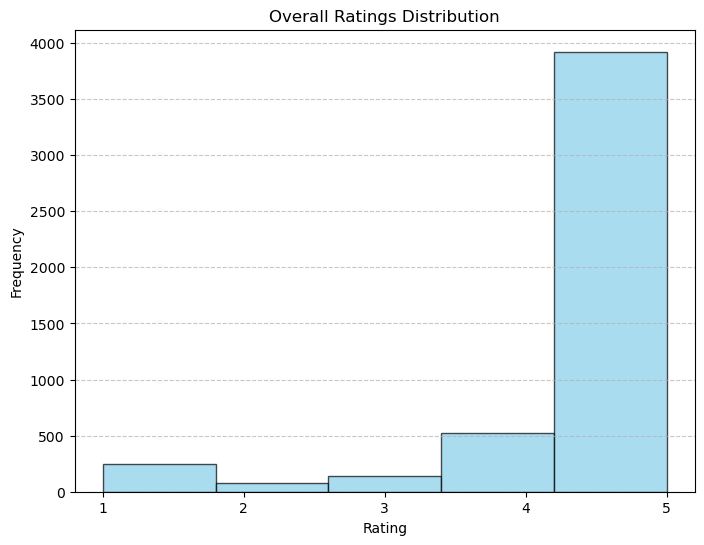

In [22]:
# Plot histogram of overall ratings
plt.figure(figsize=(8, 6))
plt.hist(amz_rev['overall'], bins=5, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Overall Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))  # Set x-axis ticks to ratings 1 through 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [23]:
# Drop rows with missing reviewText (NaNs)
amz_rev_clean = amz_rev.dropna(subset=['reviewText'])

In [24]:
# Calculate the length of each review text (number of words)
amz_rev_clean['review_length'] = amz_rev_clean['reviewText'].apply(lambda x: len(x.split()))

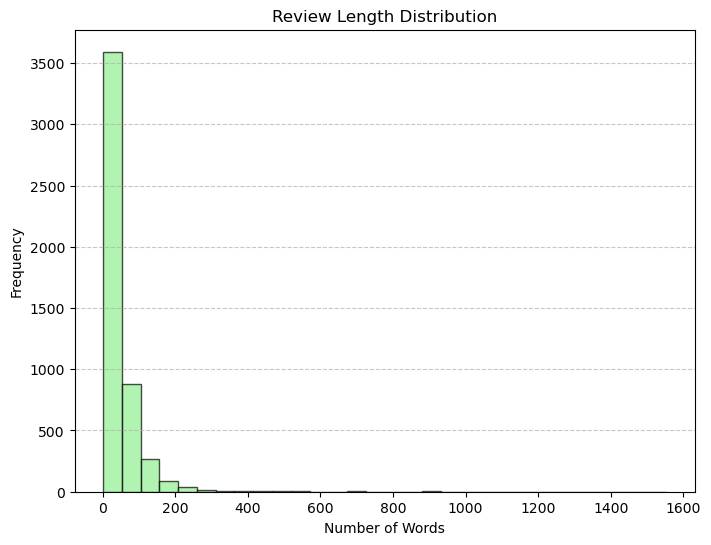

In [25]:
# Plot histogram of review lengths
plt.figure(figsize=(8, 6))
plt.hist(amz_rev_clean['review_length'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [26]:
# Convert 'reviewTime' column to datetime format
amz_rev['reviewTime'] = pd.to_datetime(amz_rev['reviewTime'])

In [27]:
# Extract year and month from 'reviewTime'
amz_rev['year'] = amz_rev['reviewTime'].dt.year
amz_rev['month'] = amz_rev['reviewTime'].dt.month

In [28]:
# Count the number of reviews per year
reviews_per_year = amz_rev.groupby('year').size()

In [29]:
# Count the number of reviews per month
reviews_per_month = amz_rev.groupby(['year', 'month']).size()

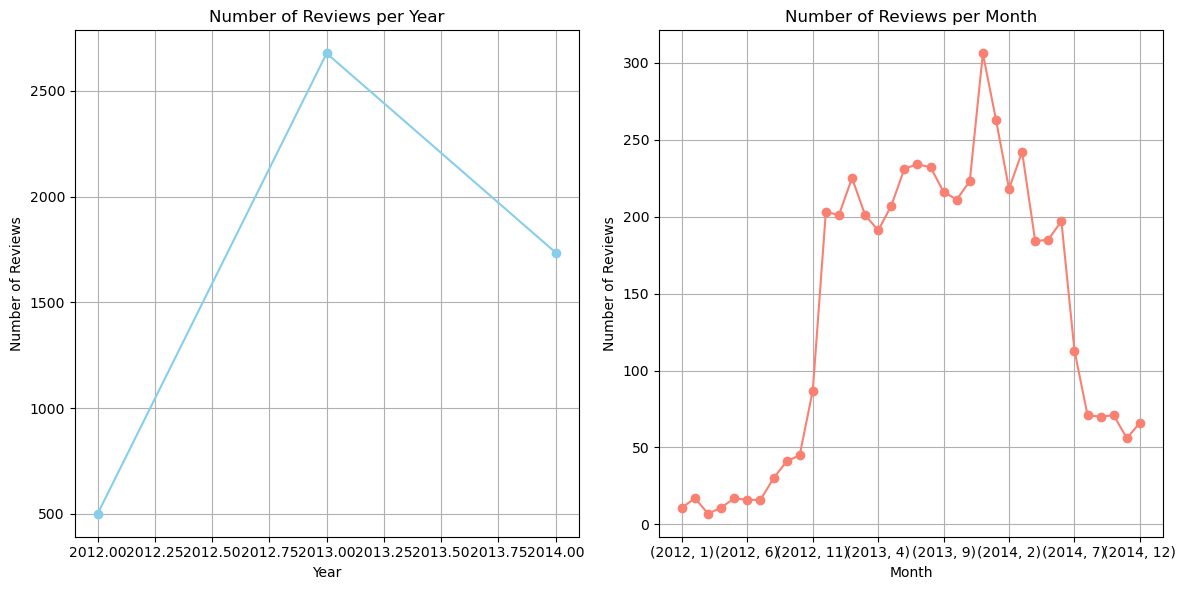

In [30]:
# Plot the number of reviews over time
plt.figure(figsize=(12, 6))
# Plot reviews per year
plt.subplot(1, 2, 1)
reviews_per_year.plot(marker='o', color='skyblue')
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)

# Plot reviews per month
plt.subplot(1, 2, 2)
reviews_per_month.plot(marker='o', color='salmon')
plt.title('Number of Reviews per Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.grid(True)

plt.tight_layout()
plt.show()

In [31]:
# Explore the distribution of helpful votes
helpful_votes_cols = ['helpful_yes', 'helpful_no', 'total_vote']
helpful_votes = amz_rev[helpful_votes_cols]
amz_rev

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,cleaned_review,tokenized_review,year,month
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0,No issues,"[issues, .]",2014,7
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0,Purchased this for my device it worked as adve...,"[Purchased, device, ,, worked, advertised, ., ...",2013,10
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0,it works as expected I should have sprung for ...,"[works, expected, ., sprung, higher, capacity,...",2012,12
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0,This think has worked out greatHad a diff bran...,"[think, worked, great.Had, diff, ., bran, 64gb...",2013,11
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0,Bought it with Retail Packaging arrived legit ...,"[Bought, Retail, Packaging, ,, arrived, legit,...",2013,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0,I bought this Sandisk GB Class to use with my...,"[bought, Sandisk, 16GB, Class, 10, use, HTC, I...",2013,7
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0,Used this for extending the capabilities of my...,"[Used, extending, capabilities, Samsung, Galax...",2013,8
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0,Great card that is very fast and reliable It c...,"[Great, card, fast, reliable, ., comes, option...",2014,3
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0,Good amount of space for the stuff I want to d...,"[Good, amount, space, stuff, want, ,, fits, Go...",2013,9


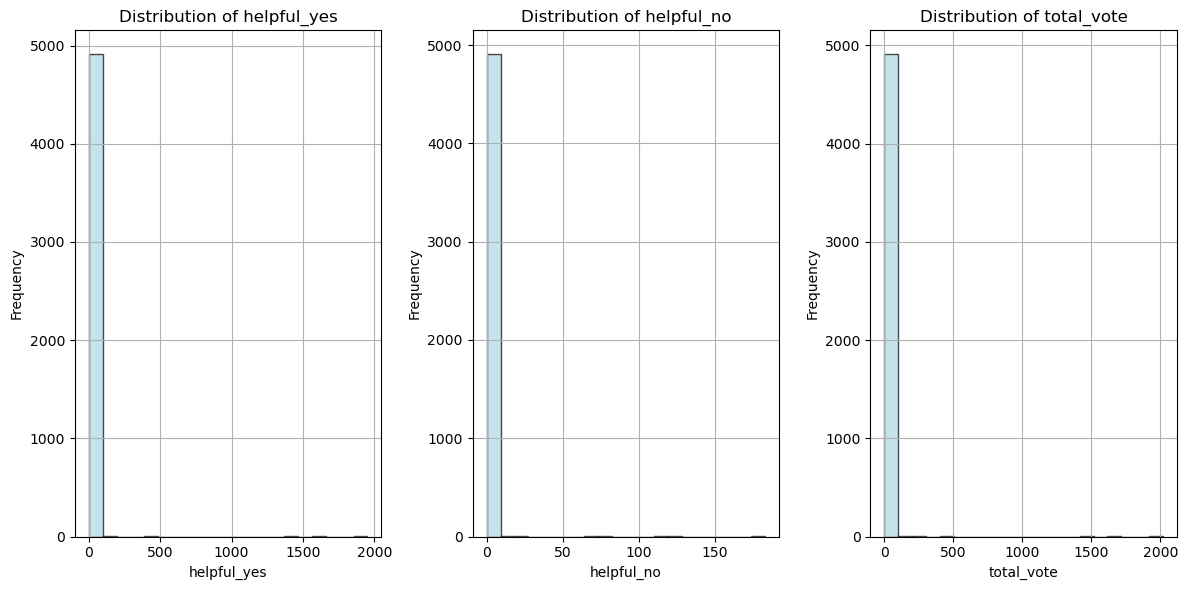

In [32]:
# Plot histograms for each helpful votes column
plt.figure(figsize=(12, 6))
for i, col in enumerate(helpful_votes_cols):
    plt.subplot(1, 3, i+1)
    plt.hist(helpful_votes[col], bins=20, color='lightblue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate helpfulness ratio
amz_rev['helpfulness_ratio'] = amz_rev['helpful_yes'] / amz_rev['total_vote']

In [33]:
# Combine all review texts into a single string
all_reviews = ' '.join(amz_rev['reviewText'].dropna())

# Tokenize the text
tokens = word_tokenize(all_reviews)

# Convert tokens to lowercase
tokens = [word.lower() for word in tokens]

# Filter out stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

# Calculate word frequency
word_freq = Counter(tokens)

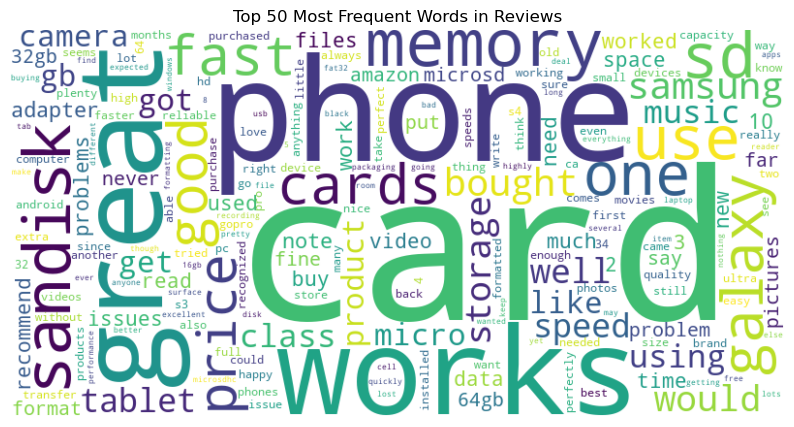

In [34]:
# Visualize the top N most frequent words using word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top 50 Most Frequent Words in Reviews')
plt.axis('off')
plt.show()

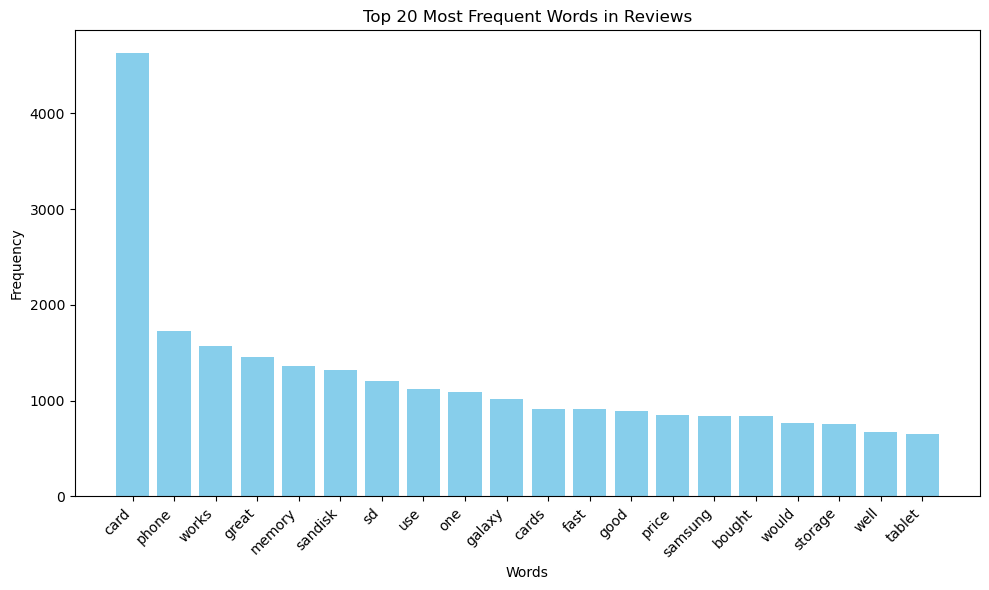

In [35]:
#visualize the top N most frequent words using a bar plot
top_n = 20
top_words = dict(word_freq.most_common(top_n))

plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values(), color='skyblue')
plt.title(f'Top {top_n} Most Frequent Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

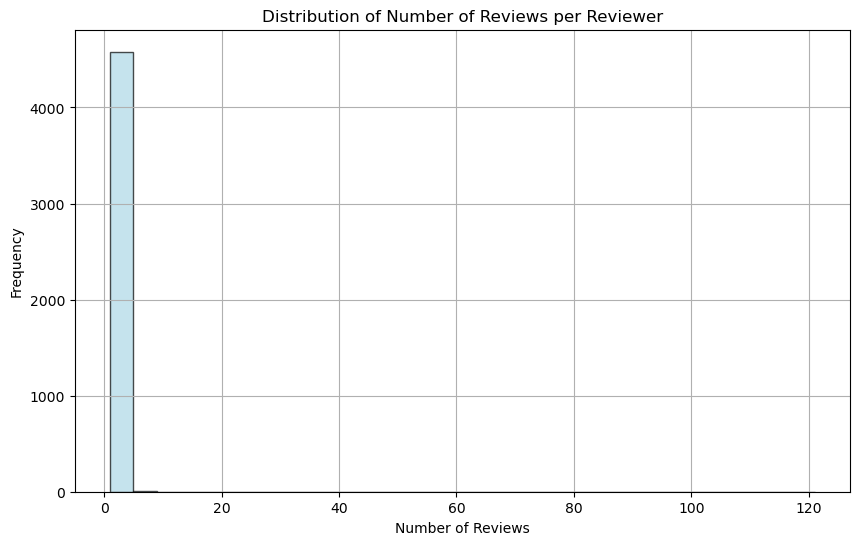

In [36]:
# Analyze the distribution of unique reviewer names
reviewer_counts = amz_rev['reviewerName'].value_counts()

# Plot histogram of number of reviews per reviewer
plt.figure(figsize=(10, 6))
plt.hist(reviewer_counts, bins=30, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Number of Reviews per Reviewer')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [37]:
# Check if there are any influential reviewers
influential_reviewers = reviewer_counts[reviewer_counts > 50] 

if influential_reviewers.empty:
    print("There are no influential reviewers.")
else:
    print("Influential Reviewers:")
    print(influential_reviewers)

Influential Reviewers:
reviewerName
Amazon Customer    121
Name: count, dtype: int64


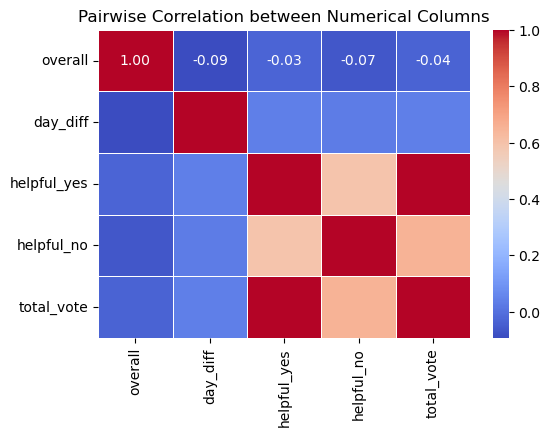

In [38]:
# Select numerical columns for correlation analysis
numerical_columns = ['overall', 'day_diff', 'helpful_yes', 'helpful_no', 'total_vote']

# Compute pairwise correlations
correlation_matrix = amz_rev[numerical_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5 , xticklabels=1)
plt.title('Pairwise Correlation between Numerical Columns')
plt.show()

# Sentiment Analysis

In [39]:
# Define a function to map ratings to sentiment labels
def map_sentiment(rating):
    if rating >= 4.0:
        return 'positive'
    elif rating <= 2.0:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to create a new column 'sentiment' in the DataFrame
amz_rev['sentiment'] = amz_rev['overall'].apply(map_sentiment)
amz_rev

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,cleaned_review,tokenized_review,year,month,helpfulness_ratio,sentiment
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0,No issues,"[issues, .]",2014,7,NaN,positive
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0,Purchased this for my device it worked as adve...,"[Purchased, device, ,, worked, advertised, ., ...",2013,10,NaN,positive
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0,it works as expected I should have sprung for ...,"[works, expected, ., sprung, higher, capacity,...",2012,12,NaN,positive
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0,This think has worked out greatHad a diff bran...,"[think, worked, great.Had, diff, ., bran, 64gb...",2013,11,NaN,positive
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0,Bought it with Retail Packaging arrived legit ...,"[Bought, Retail, Packaging, ,, arrived, legit,...",2013,7,NaN,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0,I bought this Sandisk GB Class to use with my...,"[bought, Sandisk, 16GB, Class, 10, use, HTC, I...",2013,7,NaN,negative
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0,Used this for extending the capabilities of my...,"[Used, extending, capabilities, Samsung, Galax...",2013,8,NaN,positive
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0,Great card that is very fast and reliable It c...,"[Great, card, fast, reliable, ., comes, option...",2014,3,NaN,positive
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0,Good amount of space for the stuff I want to d...,"[Good, amount, space, stuff, want, ,, fits, Go...",2013,9,NaN,positive


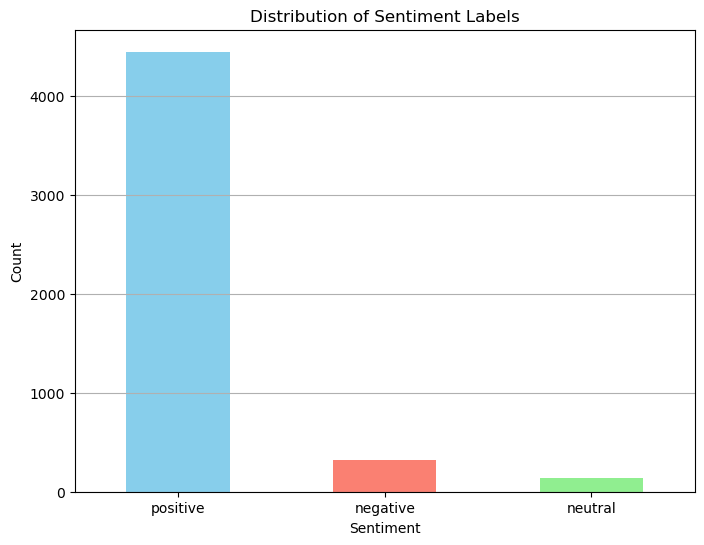

In [40]:
# Explore the distribution of sentiment labels
sentiment_counts = amz_rev['sentiment'].value_counts()

# Visualize the distribution of sentiment labels using a bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Feature Extraction

In [41]:
# Bag of Words (BoW) representation
def bow_representation(text_data):
    vectorizer = CountVectorizer()
    bow_matrix = vectorizer.fit_transform(text_data)
    return bow_matrix, vectorizer

In [42]:
# TF-IDF representation
def tfidf_representation(text_data):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(text_data)
    return tfidf_matrix, vectorizer

In [43]:
# Word embeddings representation (Word2Vec)
def word_embeddings_representation(text_data):
    # Load pre-trained Word2Vec model
    word2vec_model = api.load("word2vec-google-news-300")
    
    # Tokenize the text data into words
    tokenized_text = text_data.apply(lambda x: x.split())
    
    # Convert each word to its corresponding vector representation
    word_vectors = tokenized_text.apply(lambda x: np.mean([word2vec_model[word] 
                                                           for word in x if word in word2vec_model.key_to_index], axis=0))
    
    return np.vstack(word_vectors.values)

In [44]:
# Apply feature extraction methods to 'reviewText' column in DataFrame
text_data = amz_rev['reviewText'].astype(str)

# Bag of Words (BoW)
bow_matrix, bow_vectorizer = bow_representation(text_data)

# TF-IDF
tfidf_matrix, tfidf_vectorizer = tfidf_representation(text_data)

# Word embeddings (Word2Vec)
word_embeddings_matrix = word_embeddings_representation(text_data)

# Model Selection and Training

# SVM

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [46]:
#Drop rows with NaN values in the 'reviewText' column
amz_rev = amz_rev.dropna(subset=['reviewText'])

# Split the dataset into features (X) and target (y)
X = amz_rev['cleaned_review']  
y = amz_rev['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model on the training data
svm_model.fit(X_train_tfidf, y_train)

# Predict the sentiment labels for the test data
y_pred = svm_model.predict(X_test_tfidf)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9399796541200407


# Naive Bayes classifier

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [48]:
# Split the dataset into features (X) and target (y)
X = amz_rev['cleaned_review'] 
y = amz_rev['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000) 
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the Naive Bayes classifier (Multinomial Naive Bayes)
nb_classifier = MultinomialNB()

# Train the Naive Bayes classifier on the training data
nb_classifier.fit(X_train_tfidf, y_train)

# Predict the sentiment labels for the test data
y_pred = nb_classifier.predict(X_test_tfidf)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9155645981688708


# RNN 

In [49]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import tensorflow as tf

In [50]:
# Suppress TensorFlow deprecation warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Split the dataset into features (X) and target (y)
X = amz_rev['cleaned_review']  
y = amz_rev['sentiment']

# Convert text labels to numerical labels
label_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}
y = y.map(label_mapping)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform length
max_sequence_length = 100  
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

# Define the RNN model architecture
embedding_dim = 50  
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(units=128),
    Dense(units=3, activation='softmax') 
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the RNN model on the training data
model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_padded, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/5
56/56 [==============================] - 12s 168ms/step - loss: 0.4511 - accuracy: 0.8849 - val_loss: 0.3216 - val_accuracy: 0.9188
Epoch 2/5
56/56 [==============================] - 10s 181ms/step - loss: 0.3293 - accuracy: 0.9047 - val_loss: 0.2867 - val_accuracy: 0.9239
Epoch 3/5
56/56 [==============================] - 12s 214ms/step - loss: 0.3270 - accuracy: 0.9050 - val_loss: 0.3121 - val_accuracy: 0.9213
Epoch 4/5
56/56 [==============================] - 12s 213ms/step - loss: 0.2854 - accuracy: 0.9146 - val_loss: 0.2964 - val_accuracy: 0.9315
Epoch 5/5
31/31 [==============================] - 2s 53ms/step - loss: 0.2977 - accuracy: 0.9268
Test Loss: 0.2977111041545868
Test Accuracy: 0.9267548322677612


# Random Forest Classifier

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
# Assume you have already preprocessed your data and have features and labels
X = amz_rev['cleaned_review']
y = amz_rev['overall']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical features using TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define the model
rf_classifier = RandomForestClassifier()

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_tfidf, y_test)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Test Accuracy: 0.8026449643947101


# Accuracy Precision F1-Score Conf-Matrix

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load and preprocess the dataset
X = amz_rev['cleaned_review']  
y = amz_rev['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical vectors using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Predict with your SVM model
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

# Convert confusion matrix to DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=svm_model.classes_, columns=svm_model.classes_)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix_df)

# Find misclassified samples
misclassified_samples_indices = y_test.index[y_test != y_pred]
misclassified_samples = amz_rev.loc[misclassified_samples_indices]

# Display misclassified samples
print("\nMisclassified Samples:")
print(misclassified_samples[['reviewText', 'sentiment']])

Accuracy: 0.9399796541200407
Precision: 0.9089804507569673
Recall: 0.9399796541200407
F1 Score: 0.9211852213062034
Confusion Matrix:
 [[ 28   0  28]
 [  4   0  26]
 [  1   0 896]]
Confusion Matrix:
          negative  neutral  positive
negative        28        0        28
neutral          4        0        26
positive         1        0       896

Misclassified Samples:
                                             reviewText sentiment
4014  I bought the Sandisk Ultra 32gb card for use i...  negative
843   It may be that the internal SD slot of the 201...   neutral
2288  The card worked great at first. I've never had...  negative
1584  I like it comes in handy fits good with my Gal...   neutral
2978  It does what it says it will do - unlike most ...   neutral
1972  The chip worked fine, fit perfectly, but it is...   neutral
953   It work great in my Asus Tablet for 3 months t...   neutral
4184  I feel a little cheated, they state that this ...   neutral
3950  I am going to start spendi